<a href="https://colab.research.google.com/github/Arathi1996-P/ML-and-DEEP-LEARNING/blob/main/Fish_data_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Since our aim is to predict the particular Species we must convert the parameter 'SPECIES'into number or class. Because ML cannot read the data in terms o words or terms.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species       159 non-null    object 
 1   Weight        159 non-null    float64
 2   Length1       159 non-null    float64
 3   Length2       159 non-null    float64
 4   Length3       159 non-null    float64
 5   Height        159 non-null    float64
 6   Width         159 non-null    float64
 7   Species_name  159 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.1+ KB


In [ ]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [ ]:
Species_detail= {'Perch':0,'Bream':1,'Roach':2,'Pike':3,'Smelt':4,'Parkki':5,'Whitefish':6}
df['Species']=df['Species'].map(Species_detail)

In [ ]:
df['Species']=df['Species'].astype(str).astype(float)

**SCALING**

In [ ]:
scaler=StandardScaler()
scaler.fit(df.drop('Weight',axis=1))
scaled_features=scaler.transform(df.drop('Weight',axis=1))
df_feat =pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,-0.39867,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,-0.39867
1,-0.39867,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,-0.39867
2,-0.39867,-0.235542,-0.179332,-0.010977,0.797341,0.165793,-0.39867
3,-0.39867,0.005302,0.054694,0.196390,0.879771,0.022621,-0.39867
4,-0.39867,0.025372,0.054694,0.239592,0.812835,0.426371,-0.39867


Now all the values got scaled and transformed based on the standard normal distribution o that particlar data.

**PAIR PLOT**

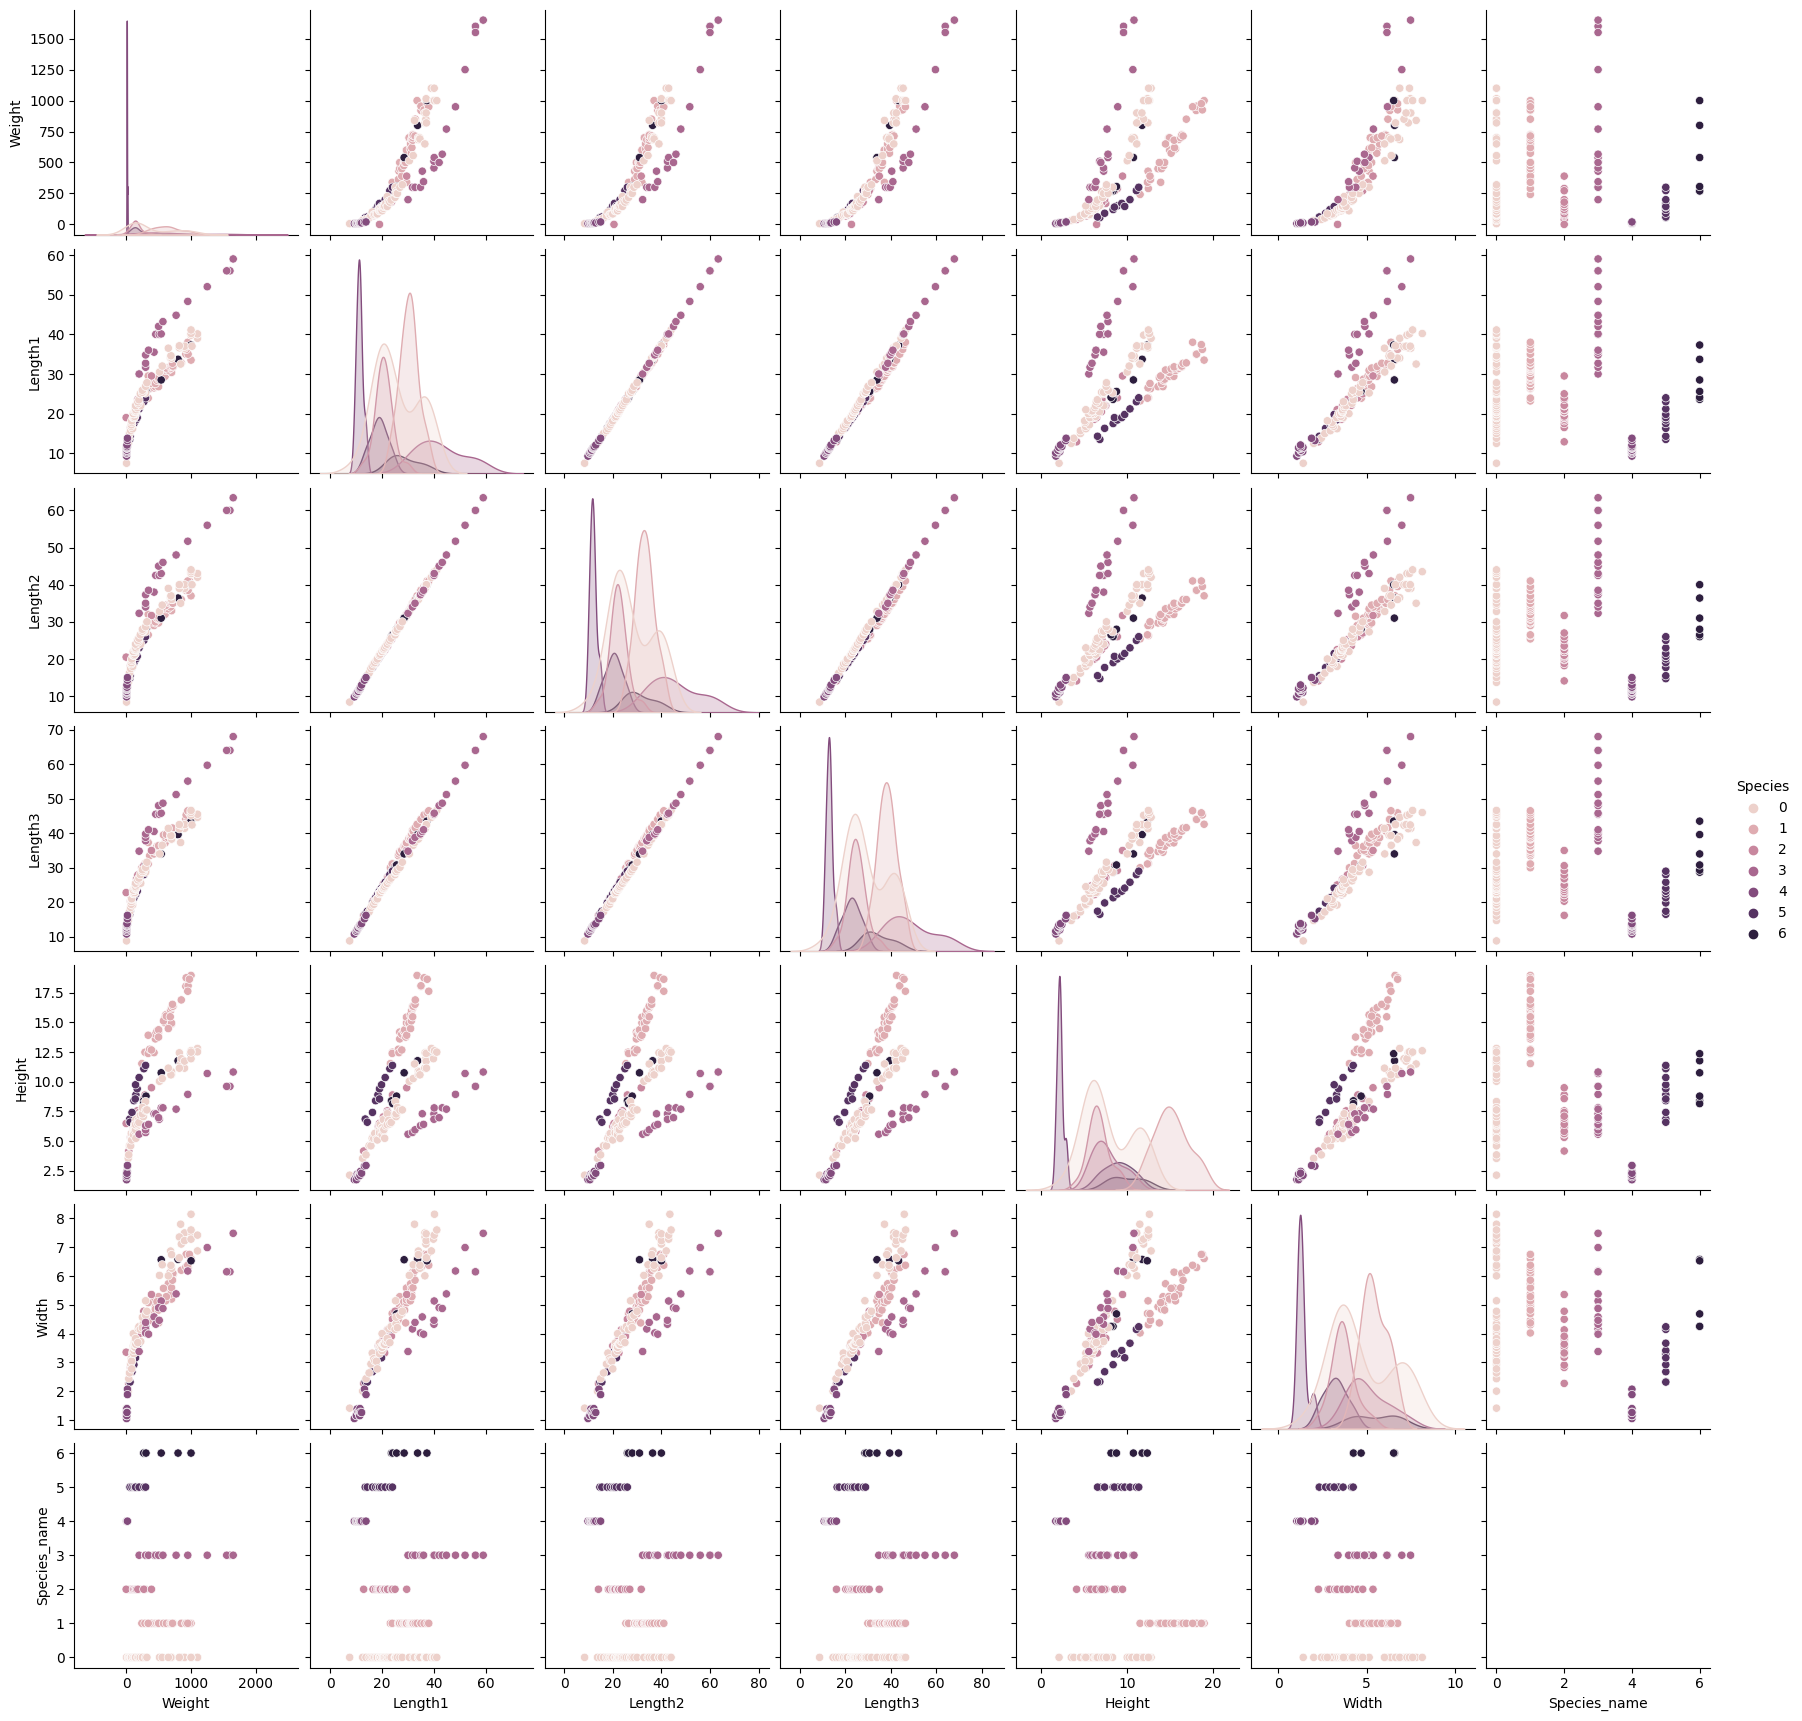

In [ ]:
sns.pairplot(df,hue='Species')

There is a lot o overlapping so that we cannot apply Logistic Regression algorith to classify the dataset.So that we can use KNN algorithm.

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['Species'],test_size=0.30)

**APPLING KNN CLASSIFIERS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Knn=KNeighborsClassifier(n_neighbors=1)
Knn.fit(x_train,y_train)
pred=Knn.predict(x_test)

**Do the prediction of K value and its evaluation**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

**Confusion matrix**

In [ ]:
print(confusion_matrix(y_test,pred))

[[20  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  1]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         1

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



**Choosing the K value**

In [ ]:
accuracy_rate=[]
for i in range(1,100):
  Knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(Knn,df_feat,df['Species'],cv=3)
  accuracy_rate.append(score.mean())

In [ ]:
error_rate=[]
for i in range(1,100):
  Knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(Knn,df_feat,df['Species'],cv=3)
  error_rate.append(1-score.mean())

**Plot the error rate**

Text(0, 0.5, 'Error Rate')

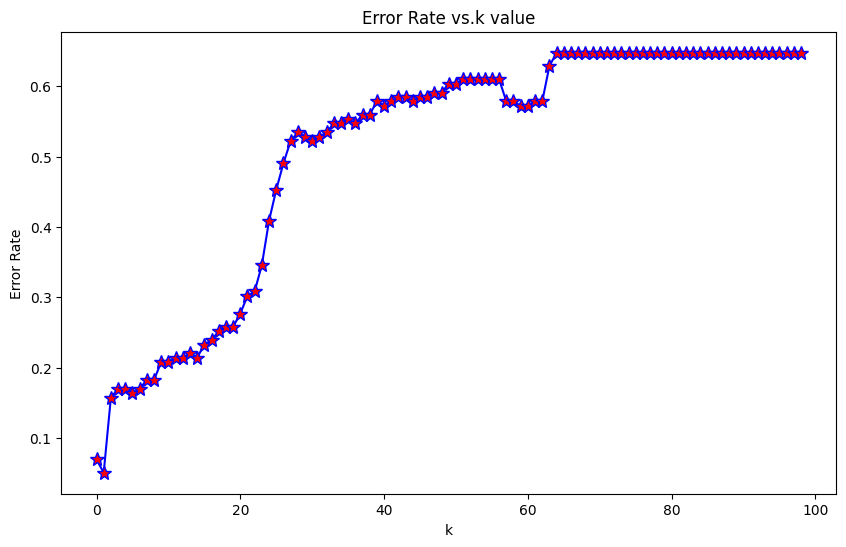

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(0,99),error_rate,color='blue',marker='*',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate vs.k value')
plt.xlabel('k')
plt.ylabel('Error Rate')

Text(0, 0.5, 'accuracy Rate')

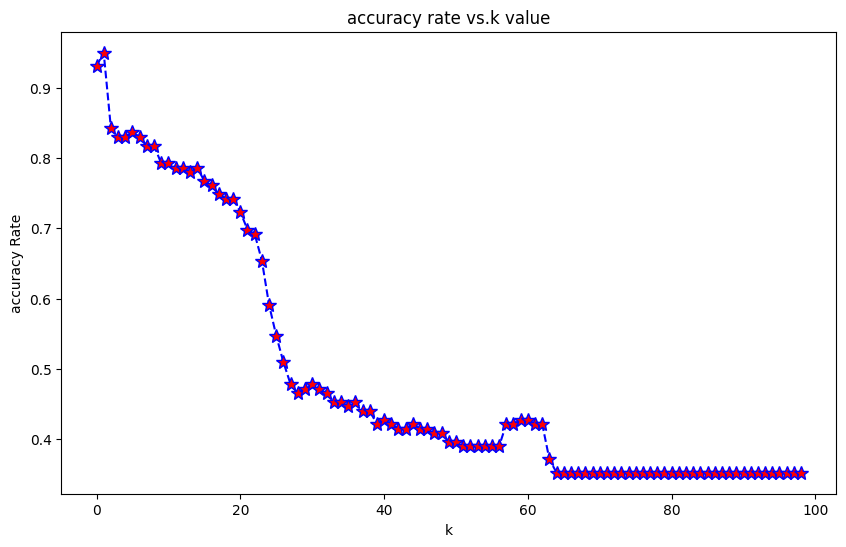

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(0,99),accuracy_rate,color='blue',linestyle='dashed',marker='*',
         markerfacecolor='red',markersize=10)
plt.title('accuracy rate vs.k value')
plt.xlabel('k')
plt.ylabel('accuracy Rate')

In [ ]:
Knn  = KNeighborsClassifier(n_neighbors=3)
Knn.fit(x_train,y_train)
pred=Knn.predict(x_test)
print('with k=60')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

with k=60


[[20  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  1]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         1

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

